# Imports from *maze.py*

In [73]:
# Heejin Chloe Jeong
# Additional comments added by Travers Rhodes

# Description:
# There are total 112 states defined by a position and a flag state.
# There are 8 possible "flag states" (indexed as given by num2flag)
# There are 13 possible "positions" (indexed as given by idx2cell)
# The overall state index is equal to positionIndex * 8 + flagStateIndex
# There are four cardinal actions.
# A reward will be given as equivalent to the number of flags you have collected at the goal state 
# (i.e. at the current state s, it performs an action a and observes a reward r and the next state s'. 
# If s'=goal state, r=the number of flags it has collected. Otherwise, r=0 ). 
# There are also six obstaces and the agent stays at the current state if it performs an action toward 
# an obstacle or off the map. The agent slips with a probability 0.1 and reaches the next clockwise 
# destination(i.e. It performed UP, but moved to its RIGHT).

import numpy as np
import random 
import pdb
# action ID : 0:UP, 1:DOWN, 2:LEFT, 3:RIGHT
# ACTMAP gives our definition of "clockwise slipping".
# That is, we meant to go 0:UP, but instead we go 3:Right. Etc.
ACTMAP = {0:3, 1:2, 2:0, 3:1}
color2num = dict(
    gray=30,
    red=31,
    green=32,
    yellow=33,
    blue=34,
    magenta=35,
    cyan=36,
    white=37,
    crimson=38
)

class Maze():
    # state ID : 0, ..., 111
    # action ID : 0:UP, 1:DOWN, 2:LEFT, 3:RIGHT
    obstacles = [(0,1),(0,3),(2,0),(2,4),(3,2),(3,4)]
    def __init__(self):
        self.episodic = True
        self.stochastic = True
        self.snum = 112
        self.anum = 4
        self.slip = 0.1
        self.dim = (4,5)
        self.start_pos = (0,0)
        self.goal_pos = (0,4)
        self.goal = (96,104)
        # self.map = np.asarray(["SWFWG","OOOOO","WOOOW","FOWFW"], dtype='c')
        self.map = np.asarray(["SWFWG","OOOOO","WOOOW","FOWFW"])
        self.img_map = np.ones(self.dim)
        for x in Maze.obstacles:
            self.img_map[x[0]][x[1]] = 0
        self.idx2cell = {0: (0, 0), 1: (1, 0), 2: (3, 0), 3: (1, 1), 4: (2, 1), 5: (3, 1),
            6: (0, 2), 7: (1, 2), 8: (2, 2), 9: (1, 3), 10: (2, 3), 11: (3, 3), 12: (0, 4), 13: (1, 4)}
        self.cell2idx = {(1, 2): 7, (0, 0): 0, (3, 3): 11, (3, 0): 2, (3, 1): 5, (2, 1): 4, 
            (0, 2): 6, (1, 3): 9, (2, 3): 10, (1, 4): 13, (2, 2): 8, (0, 4): 12, (1, 0): 1, (1, 1): 3}
    
    def step(self,state,action):
        # Input: the current state and action IDs
        # Output: reward, the next state ID, done (episodic terminal boolean value)

        if np.random.rand() < self.slip:
            a = ACTMAP[action]
        else:
            a = action
        
        cell = self.idx2cell[int(state/8)] 
        if a == 0:
            c_next = cell[1]
            r_next = max(0,cell[0]-1)
        elif a ==1:
            c_next = cell[1]
            r_next = min(self.dim[0]-1,cell[0]+1)
        elif a == 2:
            c_next = max(0,cell[1]-1)
            r_next = cell[0]
        elif a == 3:
            c_next = min(self.dim[1]-1,cell[1]+1)
            r_next = cell[0]
        else:
            print (action, a) 
            raise ValueError

        if (r_next == self.goal_pos[0]) and (c_next == self.goal_pos[1]): # Reach the exit
            v_flag = self.num2flag(state%8)
            return float(sum(v_flag)), 8*self.cell2idx[(r_next,c_next)] + state%8, True
        else:
            if (r_next,c_next) in Maze.obstacles: # obstacle tuple list
                return 0.0, state, False
            else: # Flag locations
                v_flag = self.num2flag(state%8)
                if (r_next,c_next) == (0,2):
                    v_flag[0] = 1
                elif (r_next,c_next)==(3,0):
                    v_flag[1] = 1
                elif (r_next,c_next) == (3,3):
                    v_flag[2] = 1
                return 0.0, 8*self.cell2idx[(r_next,c_next)] + self.flag2num(v_flag), False


    def num2flag(self,n):
        # n is a positive integer
        # Each element of the below tuple correspond to a status of each flag. 0 for not collected, 1 for collected. 
        flaglist = [(0,0,0),(1,0,0),(0,1,0),(0,0,1),(1,1,0),(1,0,1),(0,1,1),(1,1,1)]
        return list(flaglist[n])

    # It's hard to see this just by looking at this function, but it turns out that
    # this function is the inverse of the num2flag function, which is an easy function to understand
    def flag2num(self,v):
        # v: list
        if sum(v) < 2:
            return np.inner(v,[1,2,3])
        else:
            return np.inner(v,[1,2,3])+1

    def reset(self):
        # Return the initial state
        return 0

    # print out the map
    # and use a different text color for the current location of the robot
    def plot(self,state,action):
        cell = self.idx2cell[int(state/8)] 
        desc = self.map.tolist()

        desc[cell[0]] = desc[cell[0]][:cell[1]] + '\x1b[1;32m' + desc[cell[0]][cell[1]] + '\x1b[0m' + desc[cell[0]][cell[1]+1:]

        print("action: ", ["UP","DOWN","LEFT","RIGHT"][action] if action is not None else None)
        print("\n".join("".join(row) for row in desc))

### Simple Testing code added by Travers
if __name__ == '__main__':
    maze = Maze()
    # This test shows that maze.flag2num is indeed the inverse of maze.num2flag
    for i in range(8):
        np.testing.assert_almost_equal(i, maze.flag2num(maze.num2flag(i)))
        

### Example main method to allow interaction with the environment
if __name__ == '__main__':
    maze = Maze()

    state = maze.reset()
    maze.plot(state, None)

    while True:
        # 0:UP, 1:DOWN, 2:LEFT, 3:RIGHT
        action = input("Enter Action [0 (for UP), 1 (for DOWN), 2 (for LEFT), 3 (for RIGHT), 4 (to reset), 5 (to quit)]: ")
        action = int(action)
        if action == 5:
            break
        elif action==4:
            state = maze.reset()
            action = None
        else:
            reward, state, done = maze.step(state, action)
            print("Current reward: %s" % reward)
        maze.plot(state, action)


action:  None
SWFWG
OOOOO
WOOOW
FOWFW
Enter Action [0 (for UP), 1 (for DOWN), 2 (for LEFT), 3 (for RIGHT), 4 (to reset), 5 (to quit)]: 5


# Start

Goal: implement either Policy Iteration or Value Iteration and find an **optinal policy** and the **optimal Q values** (action values) for all state and action pairs in Maze.

In [74]:
import numpy as np
env = Maze()
initial_state = env.reset()
state = initial_state
action = np.random.choice(4,)
reward, next_state, done = env.step(state, action)
env.plot(state, action)

action:  UP
SWFWG
OOOOO
WOOOW
FOWFW


In [ ]:
reward, next_state, done

(0.0, 0, False)

In [ ]:
V = [0 for i in range(env.snum)]
V[-1] = 0
len(V)

112

In [ ]:
Q = np.zeros((env.snum, env.anum))
Q.shape

(112, 4)

In [ ]:
policy = np.zeros(env.snum)

In [ ]:
env.step(state, action)

(0.0, 0, False)

In [ ]:
env.slip

0.1

## Find V values

In [92]:
V = [0 for i in range(env.snum)]
V[-1] = 0
len(V)

deltas = []

discount = 0.9

def find_sum(state, action):
    result = 0
    reward, next_state, done = env.step(state, action)
    p = 1 - env.slip
    result += p * (reward + discount * V[next_state])
    #print("Rresult step 1", result)
    alt_action = ACTMAP[action]
    s_reward, s_next_state, s_done = env.step(state, alt_action)
    p_s = env.slip
    #print(p_s)
    result += p_s * (s_reward + discount * V[s_next_state])
    #print("Result step 2", result)
    #print(result)
    return result

theta = 1.6

i = 0
while True:
    delta = 0
    for s in range(env.snum):
        v = V[s]
        action_results = []
        for a in range(env.anum):
            result = find_sum(s, a)
            #print(result)
            action_results.append(result)
        #print(v, V[s])
        V[s] = max(action_results)
        #print(V[s])
        delta = max(delta, np.abs(v - V[s]))
    print("delta", delta)
    deltas.append(delta)
    i += 1
    #print(i)
    if delta < theta:
        break

delta 5.13
delta 4.5322000000000005
delta 3.3657930000000005
delta 4.732967134619999
delta 3.9777831829145693
delta 3.4850816522262003
delta 4.1458772496261
delta 4.573283850466225
delta 3.065987983726803
delta 3.7757956471584073
delta 2.9742019940555853
delta 3.6692023095217827
delta 5.749191931386629
delta 3.991593357074681
delta 3.9688641303424816
delta 3.726145719812255
delta 2.900184534632091
delta 2.5219141063137407
delta 3.7187190917271646
delta 3.3999432914292615
delta 3.847360031437132
delta 3.6121735744634833
delta 4.443404014038119
delta 3.29735988717459
delta 3.061094735096045
delta 4.354601359487772
delta 3.1964070016329345
delta 2.314007660125906
delta 3.7649650803987385
delta 4.247177937468944
delta 2.3820835412449313
delta 2.211245215160986
delta 2.133972395239624
delta 3.892689115030848
delta 4.082828079279018
delta 2.622188417185738
delta 2.043976996332468
delta 2.157080245933896
delta 1.9950313599556093
delta 3.056162527551736
delta 1.8478272290346105
delta 2.6966990

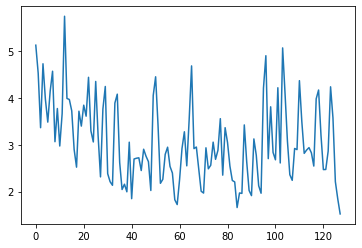

In [93]:
import matplotlib.pyplot as plt

plt.plot(deltas)

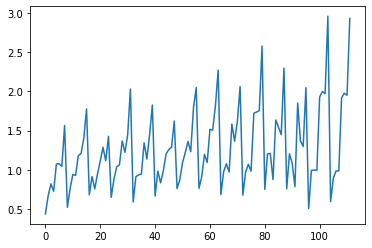

In [94]:
import matplotlib.pyplot as plt
plt.plot([i/10 for i in V])

## Find Q values

In [95]:
for s in range(env.snum):
    for a in range(env.anum):
        Q[s, a] = find_sum(s, a)

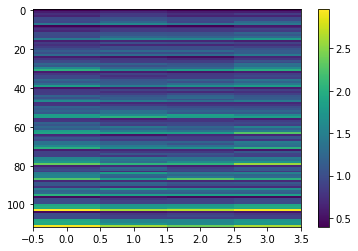

In [96]:
plt.imshow(Q/10, interpolation='nearest', aspect='auto')
plt.colorbar()

## Find optimal policy

In [97]:
for s in range(env.snum):
    chosen_action = np.argmax(Q[s,:])
    policy[s] = chosen_action

<BarContainer object of 112 artists>

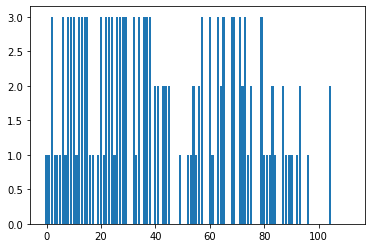

In [98]:
plt.bar(np.arange(len(policy)), policy)

## Show progress of optimal policy

In [99]:
policy

array([1., 1., 3., 1., 1., 1., 3., 1., 3., 3., 3., 1., 3., 3., 3., 3., 1.,
       1., 0., 1., 3., 1., 3., 3., 3., 1., 3., 3., 3., 3., 0., 0., 3., 1.,
       3., 0., 3., 3., 3., 0., 2., 2., 0., 2., 2., 2., 0., 0., 0., 1., 0.,
       0., 1., 1., 2., 1., 2., 3., 0., 0., 3., 1., 0., 3., 2., 3., 0., 0.,
       3., 3., 0., 3., 2., 3., 1., 2., 0., 0., 0., 3., 1., 1., 1., 2., 1.,
       0., 0., 2., 1., 1., 1., 0., 1., 2., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
state = 0
done = False
while not done:
    action = int(policy[state])
    reward, next_state, done = env.step(state, action)
    print('state:',state,'action:',["UP","DOWN","LEFT","RIGHT"][action],'reward:',reward)
    env.plot(state, action)
    state = next_state

state: 0 action: DOWN reward: 0.0
action:  DOWN
SWFWG
OOOOO
WOOOW
FOWFW
state: 8 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 24 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 56 action: LEFT reward: 0.0
action:  LEFT
SWFWG
OOOOO
WOOOW
FOWFW
state: 24 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 32 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 64 action: LEFT reward: 0.0
action:  LEFT
SWFWG
OOOOO
WOOOW
FOWFW
state: 32 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 64 action: LEFT reward: 0.0
action:  LEFT
SWFWG
OOOOO
WOOOW
FOWFW
state: 32 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 64 action: LEFT reward: 0.0
action:  LEFT
SWFWG
OOOOO
WOOOW
FOWFW
state: 32 action: RIGHT reward: 0.0
action:  RIGHT
SWFWG
OOOOO
WOOOW
FOWFW
state: 64 action: LEFT reward: 0.0
action:  LEFT
SWFWG
OOOOO
WOOOW
FOWFW
state: 32 action: RIGHT reward: 0.0
act

## Save Q-values

In [101]:
with open("qvalues.npy", "wb") as f:
    np.save(f, Q)

# Evaluation

In [102]:
# Heejin Chloe Jeong

import numpy as np

def get_action_egreedy(values, epsilon):
    # Implement epsilon greedy action policy
    r = random.random()
    if r <= epsilon:
        return random.randint(0, env.anum - 1)
    return np.argmax(values)

def evaluation(env, Q_table, step_bound = 100, num_itr = 10):
	"""
	Semi-greedy evaluation for discrete state and discrete action spaces and an episodic environment.

	Input:
		env : an environment object. 
		Q : A numpy array. Q values for all state and action pairs. 
			Q.shape = (the number of states, the number of actions)
		step_bound : the maximum number of steps for each iteration
		num_itr : the number of iterations

	Output:
		Total number of steps taken to finish an episode (averaged over num_itr trials)
		Cumulative reward in an episode (averaged over num_itr trials)

	"""
	total_step = 0 
	total_reward = 0 
	itr = 0 
	while(itr<num_itr):
		step = 0
		np.random.seed()
		state = env.reset()
		reward = 0.0
		done = False
		while((not done) and (step < step_bound)):
			action = get_action_egreedy(Q_table[state], 0.05)
			r, state_n, done = env.step(state,action)
			state = state_n
			reward += r
			step +=1
		total_reward += reward
		total_step += step
		itr += 1
	return total_step/float(num_itr), total_reward/float(num_itr)


# Q learning

## Find Q table

### Helper function

In [ ]:
def find_value(state, current_Q_table):
    Vmax = np.float('-inf')
    for a in range(env.anum):
        value = current_Q_table[state, a]
        Vmax = max(Vmax, value)
    return Vmax

### Main functions

I will first try to implement Q learning without using epsilon-greedy action selection.

In [ ]:
s = env.reset()
s

0

In [ ]:
env.step(s, 0)

(0.0, 0, False)

In [129]:
def get_action(V, epsilon=0.1):
    if np.random.random() < epsilon:
        return np.random.randint(0,len(V))
    else:
        return np.argmax(V)

def q_learning_maze(env, lr=0.1, discount=0.9, n_steps=5000, Q_star=Q.copy(), epsilon=0.1):
    current_Q_table = np.random.uniform(0, 3, ((env.snum, env.anum)))
    current_Q_table[-1] = 0

    eval_steps, eval_reward, RMSE = [], [], []

    for i in range(n_steps):
        s = env.reset()
        done = False
        while not done:
            action = get_action(current_Q_table[s], epsilon=epsilon)
            reward, following_state, done = env.step(s, action)
            current_Q_table[s, action] = (1 - lr) * current_Q_table[s, action] + \
                lr * (reward + discount * calcV(following_state))
            s = following_state

        if i % 50 == 0:
            avg_step, avg_reward = evaluation(Maze(), current_Q_table.copy())
            eval_steps.append(avg_step)
            eval_reward.append(avg_reward)
            mse = (np.square(current_Q_table - Q_star)).mean(axis=None)
            RMSE.append(np.sqrt(mse))
            #print(i)
        if i == n_steps:
            break
    return current_Q_table, eval_steps, eval_reward, RMSE



In [116]:
current_Q_table, eval_steps8, eval_reward8, RMSE8 = q_learning_maze(env, lr=0.1, discount=0.8)
current_Q_table, eval_steps9, eval_reward9, RMSE9 = q_learning_maze(env, lr=0.1, discount=0.9)
current_Q_table, eval_steps95, eval_reward95, RMSE95 = q_learning_maze(env, lr=0.1, discount=0.95)

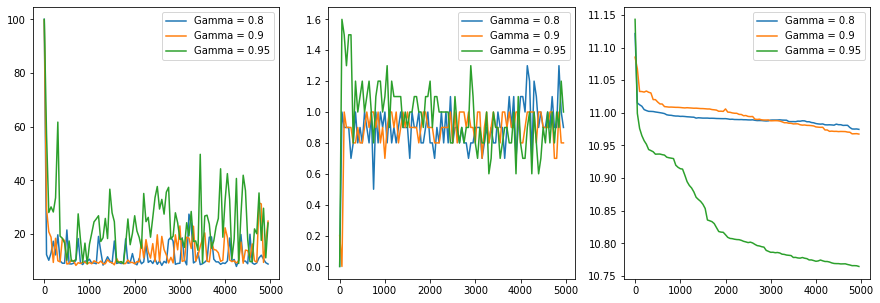

In [117]:
# Plot example #
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(np.arange(0,5000,50), eval_steps8, label="Gamma = 0.8")#repeat for different algs.
ax1.plot(np.arange(0,5000,50), eval_steps9, label="Gamma = 0.9")
ax1.plot(np.arange(0,5000,50), eval_steps95, label="Gamma = 0.95")
ax1.legend()

ax2.plot(np.arange(0,5000,50),eval_reward8, label="Gamma = 0.8")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward9, label="Gamma = 0.9")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward95, label="Gamma = 0.95")#repeat for different algs. 
ax2.legend()

ax3.plot(np.arange(0,5000,50),RMSE8, label="Gamma = 0.8")#repeat for different algs
ax3.plot(np.arange(0,5000,50),RMSE9, label="Gamma = 0.9")
ax3.plot(np.arange(0,5000,50),RMSE95, label="Gamma = 0.95")
ax3.legend()

In [127]:
current_Q_table, eval_steps05, eval_reward05, RMSE05 = q_learning_maze(env, lr=0.05, discount=0.9)
current_Q_table, eval_steps1, eval_reward1, RMSE1 = q_learning_maze(env, lr=0.1, discount=0.9)
current_Q_table, eval_steps2, eval_reward2, RMSE2 = q_learning_maze(env, lr=0.2, discount=0.9)
current_Q_table, eval_steps5, eval_reward5, RMSE5 = q_learning_maze(env, lr=0.5, discount=0.9)

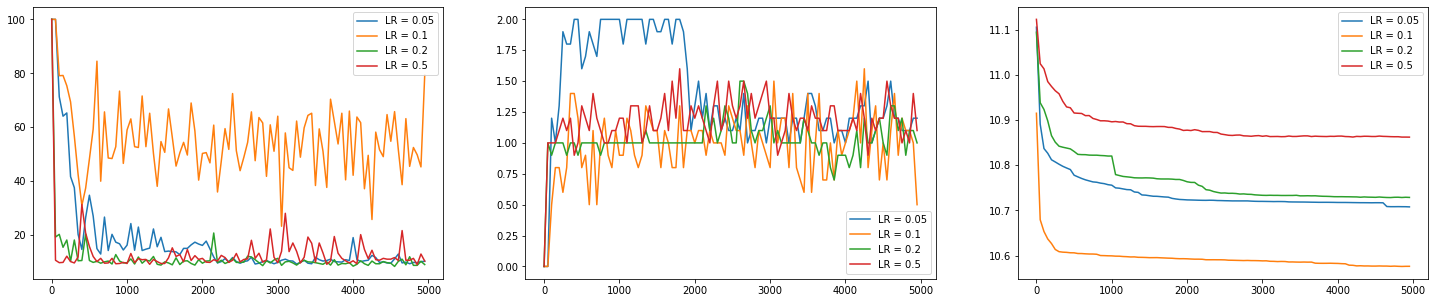

In [128]:
# Plot example #
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))
ax1.plot(np.arange(0,5000,50), eval_steps05, label="LR = 0.05")#repeat for different algs.
ax1.plot(np.arange(0,5000,50), eval_steps1, label="LR = 0.1")
ax1.plot(np.arange(0,5000,50), eval_steps2, label="LR = 0.2")
ax1.plot(np.arange(0,5000,50), eval_steps5, label="LR = 0.5")
ax1.legend()

ax2.plot(np.arange(0,5000,50),eval_reward05, label="LR = 0.05")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward1, label="LR = 0.1")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward2, label="LR = 0.2")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward5, label="LR = 0.5")#repeat for different algs. 
ax2.legend()

ax3.plot(np.arange(0,5000,50),RMSE05, label="LR = 0.05")#repeat for different algs
ax3.plot(np.arange(0,5000,50),RMSE1, label="LR = 0.1")
ax3.plot(np.arange(0,5000,50),RMSE2, label="LR = 0.2")
ax3.plot(np.arange(0,5000,50),RMSE5, label="LR = 0.5")
ax3.legend()

In [136]:
#current_Q_table, eval_steps05, eval_reward05, RMSE05 = q_learning_maze(env, lr=0.05, epsilon=0.01)
#current_Q_table, eval_steps1, eval_reward1, RMSE1 = q_learning_maze(env, lr=0.05, epsilon=0.05)
current_Q_table, eval_steps2, eval_reward2, RMSE2 = q_learning_maze(env, lr=0.05, epsilon=0.1)
current_Q_table, eval_steps5, eval_reward5, RMSE5 = q_learning_maze(env, lr=0.05, epsilon=0.25)

KeyboardInterrupt: ignored

In [ ]:
# Plot example #
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))
ax1.plot(np.arange(0,5000,50), eval_steps05, label="Epsilon = 0.01")#repeat for different algs.
ax1.plot(np.arange(0,5000,50), eval_steps1, label="Epsilon = 0.01")
ax1.plot(np.arange(0,5000,50), eval_steps2, label="Epsilon = 0.01")
ax1.plot(np.arange(0,5000,50), eval_steps5, label="Epsilon = 0.01")
ax1.legend()

ax2.plot(np.arange(0,5000,50),eval_reward05, label="Epsilon = 0.01")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward1, label="Epsilon = 0.01")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward2, label="Epsilon = 0.01")#repeat for different algs. 
ax2.plot(np.arange(0,5000,50),eval_reward5, label="Epsilon = 0.01")#repeat for different algs. 
ax2.legend()

ax3.plot(np.arange(0,5000,50),RMSE05, label="Epsilon = 0.01")#repeat for different algs
ax3.plot(np.arange(0,5000,50),RMSE1, label="Epsilon = 0.01")
ax3.plot(np.arange(0,5000,50),RMSE2, label="Epsilon = 0.01")
ax3.plot(np.arange(0,5000,50),RMSE5, label="Epsilon = 0.01")
ax3.legend()

In [ ]:
current_Q_table

array([[1.03714986, 1.13480799, 1.03672371, 1.06084917],
       [1.15155406, 1.14273951, 1.11952684, 1.14684562],
       [0.84187966, 0.95950763, 0.95232522, 0.95589586],
       [1.12021669, 1.98408263, 2.04798644, 2.05756049],
       [0.9877921 , 1.01899198, 0.9915905 , 0.99594171],
       [1.61942301, 1.616309  , 1.62525891, 1.62326955],
       [0.99157232, 1.12440973, 0.57448736, 0.99774609],
       [0.92648686, 1.54738439, 0.4135606 , 1.15952167],
       [1.06471889, 1.16983421, 1.15590126, 1.28167987],
       [1.17638606, 1.14437417, 1.13789259, 1.59319169],
       [0.94569355, 0.98642528, 0.96350766, 1.0210331 ],
       [1.28413771, 0.16549439, 1.38378135, 1.38544911],
       [1.29956684, 0.87002657, 1.32051958, 1.32945927],
       [1.60871076, 1.60659693, 1.6106558 , 2.14808369],
       [0.83136849, 1.24820683, 1.24423429, 1.37091658],
       [1.60221607, 0.14732422, 0.93703761, 1.59598458],
       [2.5970445 , 1.13970549, 0.8894108 , 0.77075864],
       [0.54929521, 1.12540539,

# OpenAI Gym

In [137]:
import gym
import matplotlib.pyplot as plt

record = np.zeros((10000, 6))

env = gym.make('Acrobot-v1')
env.reset()
for i_episode in range(20):
    observation = env.reset()
  
    for t in range(500):
        #env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        record[i_episode*500+t] = observation
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps


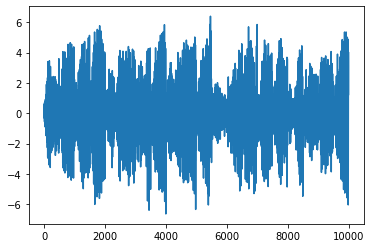

In [ ]:
plt.plot(record[:,5])

In [ ]:
print("Action space", env.action_space)
print("Observation space", env.observation_space)

Action space Discrete(3)
Observation space Box(-28.274333953857422, 28.274333953857422, (6,), float32)


## Look at range in values

In [ ]:
print("Observation space", env.observation_space.high)
print("Observation space", env.observation_space.low)

Observation space [ 1.        1.        1.        1.       12.566371 28.274334]
Observation space [ -1.        -1.        -1.        -1.       -12.566371 -28.274334]


## Normalize values

The two last values are not within the same ranges as the other values. We will now ensure these also range between -1 and 1. 

In [ ]:
record[:,4] = record[:,4] / 12.56
record[:,5] = record[:,5] / 28.27

In [ ]:
(np.min(record[:,5]), np.max(record[:,5]))

(-0.23514521402467445, 0.2263810896116628)

## Function approximation

In [142]:
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable

In [143]:
class PolicyEst(nn.Module):
    def __init__(self, env):
        super(PolicyEst, self).__init__()
        self.n_in = env.observation_space.shape[0]
        self.n_out = env.action_space.n
        self.hidden = 32
        self.linear1 = nn.Linear(self.n_in, self.hidden)
        self.linear2 = nn.Linear(self.hidden, self.n_out)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim = -1)
    
    def forward(self, state):
        state = torch.Tensor(state)
        action_probs = self.linear1(state)
        action_probs = self.relu(action_probs)
        action_probs = self.linear2(action_probs)
        action_probs = self.softmax(action_probs)
        return action_probs

In [144]:
import gym
env = gym.make('Acrobot-v1')
policy_est = PolicyEst(env)

In [145]:
policy_est.forward(record[200])

tensor([0.3284, 0.3606, 0.3110], grad_fn=<SoftmaxBackward>)

## REINFORCE

https://lilianweng.github.io/lil-log/2018/04/08/policy-gradient-algorithms.html#policy-gradient-algorithms

In [222]:
def estimate_return(rewards, gamma):
    G = np.zeros((len(rewards),))
    rewards = rewards.copy()
    rewards.reverse()
    for (i, r) in enumerate(rewards):
        index = len(rewards) - i - 2
        if index < 0:
            break
        G[index] = r + gamma * G[index + 1]
    return G

def REINFORCE(env, iterations, policy_estimator, lr, gamma = 0.9, baseline_window=None, mc=False):
    optimizer = optim.Adam(policy_estimator.parameters(), lr=lr)
    n_actions = env.action_space.n
    total_rewards = []
    steps = []
    for it in range(iterations):
        this_reward = 0
        states = []
        actions = []
        rewards = []
        done = False
        s = env.reset()
        t = 0
        while not done:
            states.append(s)
            p = policy_estimator.forward(s).detach().numpy()
            # Normalize because sum may not be exactly 1
            p = np.asarray(p).astype('float64')
            p /= p.sum()
            if mc:
                if t == 0:
                    a = np.random.choice(n_actions, p=p)
                    t += 1
                elif t == 4:
                    t = 0
                else:
                    t += 1
            else:
                a = np.random.choice(n_actions, p=p)
            actions.append(a)
            #print(a)
            next_s, r, done, _ = env.step(a)
            #if it % 50 == 0:
            #    env.render()
            rewards.append(r)
            if done:
                print("Iteration finished after", len(states), "timesteps")
                steps.append(len(states))
                break
            s = next_s
            this_reward += r
        total_rewards.append(this_reward) 
 
        rewards = estimate_return(rewards, gamma)

        # Use baseline as moving average of rewards
        if baseline_window:
            n = baseline_window
            ma = np.convolve(rewards, np.ones((n,))/n, mode='same') 
            rewards -= ma

        optimizer.zero_grad()
        state_tensor = torch.FloatTensor(states)
        reward_tensor = torch.FloatTensor(rewards)
        action_tensor = torch.LongTensor(actions)

        # Calculate loss
        logprob = torch.log(policy_estimator.forward(state_tensor))
        selected_logprobs = reward_tensor * logprob[[i for i in range(len(action_tensor))], action_tensor]
        loss = -selected_logprobs.sum()
        # Calculate gradients
        loss.backward()
        # Apply gradients
        optimizer.step()    
          

    return total_rewards, steps

### Acrobot

In [195]:
env = gym.make('Acrobot-v1')
policy_est = PolicyEst(env)

eval_rewards, eval_steps = REINFORCE(env, 250, policy_est, 0.01, gamma = 0.99, baseline_window=10)

Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 347 timesteps
Iteration finished after 333 timesteps
Iteration finished after 500 timesteps
Iteration finished after 270 timesteps
Iteration finished after 360 timesteps
Iteration finished after 360 timesteps
Iteration finished after 242 timesteps
Iteration finished after 461 timesteps
Iteration finished after 316 timesteps
Iteration finished after 274 timesteps
Iteration finished after 301 timesteps
Iteration finished after 232 timesteps
Iteration finished after 479 timesteps
Iteration finished after 285 timesteps
Iteration finished after 275 timesteps
Iteration finished after 267 timesteps
Iteration finished after 204 timesteps
Iteration finished after 443 timesteps
Iteration finished after 

In [196]:
len(eval_rewards)

250

In [197]:
rew_ar = np.array(eval_rewards)
rew_ar.shape

(250,)

In [198]:
rew_ar = rew_ar.reshape(25, 10)

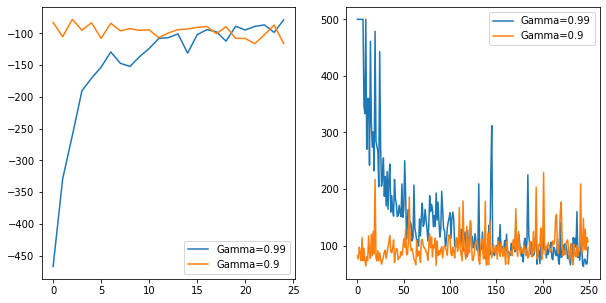

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(rew_ar.mean(axis=1), label="Gamma=0.99")
ax1.plot(rew_ar9.mean(axis=1), label="Gamma=0.9")
ax1.legend()
ax2.plot(eval_steps, label="Gamma=0.99")
ax2.plot(eval_steps9, label="Gamma=0.9")
ax2.legend()

In [203]:
eval_rewards9, eval_steps9 = REINFORCE(env, 250, policy_est, 0.01, gamma = 0.9, baseline_window=10)

Iteration finished after 82 timesteps
Iteration finished after 76 timesteps
Iteration finished after 97 timesteps
Iteration finished after 88 timesteps
Iteration finished after 73 timesteps
Iteration finished after 114 timesteps
Iteration finished after 73 timesteps
Iteration finished after 95 timesteps
Iteration finished after 74 timesteps
Iteration finished after 64 timesteps
Iteration finished after 80 timesteps
Iteration finished after 73 timesteps
Iteration finished after 117 timesteps
Iteration finished after 86 timesteps
Iteration finished after 77 timesteps
Iteration finished after 120 timesteps
Iteration finished after 82 timesteps
Iteration finished after 125 timesteps
Iteration finished after 85 timesteps
Iteration finished after 217 timesteps
Iteration finished after 78 timesteps
Iteration finished after 73 timesteps
Iteration finished after 91 timesteps
Iteration finished after 73 timesteps
Iteration finished after 87 timesteps
Iteration finished after 77 timesteps
Iterati

In [204]:
rew_ar9 = np.array(eval_rewards9)
rew_ar9 = rew_ar9.reshape(25, 10)

In [226]:
env = gym.make('Acrobot-v1')
policy_est = PolicyEst(env)

eval_rewards05, eval_steps05 = REINFORCE(env, 250, policy_est, 0.05, gamma = 0.9, baseline_window=10)

Iteration finished after 500 timesteps
Iteration finished after 189 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 280 timesteps
Iteration finished after 222 timesteps
Iteration finished after 218 timesteps
Iteration finished after 157 timesteps
Iteration finished after 213 timesteps
Iteration finished after 362 timesteps
Iteration finished after 359 timesteps
Iteration finished after 465 timesteps
Iteration finished after 364 timesteps
Iteration finished after 500 timesteps
Iteration finished after 334 timesteps
Iteration finished after 465 timesteps
Iteration finished after 136 timesteps
Iteration finished after 214 timesteps
Iteration finished after 274 timesteps
Iteration finished after 491 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 

In [234]:
rew_ar05 = np.array(eval_rewards05)
rew_ar05 = rew_ar05.reshape(25, 10)

In [230]:
env = gym.make('Acrobot-v1')
policy_est = PolicyEst(env)

eval_rewards005, eval_steps005 = REINFORCE(env, 250, policy_est, 0.005, gamma = 0.9, baseline_window=10)

Iteration finished after 409 timesteps
Iteration finished after 499 timesteps
Iteration finished after 390 timesteps
Iteration finished after 500 timesteps
Iteration finished after 464 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 467 timesteps
Iteration finished after 427 timesteps
Iteration finished after 361 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 353 timesteps
Iteration finished after 500 timesteps
Iteration finished after 375 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 386 timesteps
Iteration finished after 383 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 500 timesteps
Iteration finished after 

In [232]:
rew_ar005 = np.array(eval_rewards005)
rew_ar005 = rew_ar005.reshape(25, 10)

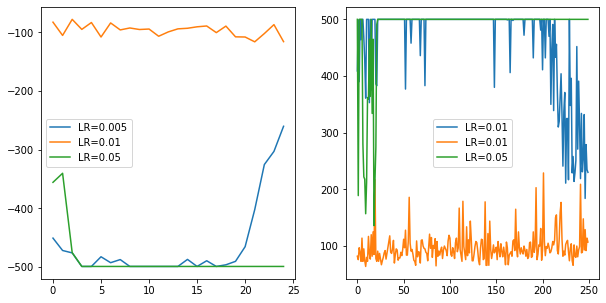

In [235]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.plot(rew_ar005.mean(axis=1), label="LR=0.005")
ax1.plot(rew_ar9.mean(axis=1), label="LR=0.01")
ax1.plot(rew_ar05.mean(axis=1), label="LR=0.05")
ax1.legend()
ax2.plot(eval_steps005, label="LR=0.01")
ax2.plot(eval_steps9, label="LR=0.01")
ax2.plot(eval_steps05, label="LR=0.05")
ax2.legend()

### MountainCar

In [261]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
policy_est = PolicyEst(env)

total_rewards005, steps005 = REINFORCE(env, 250, policy_est, 0.005, gamma = 0.9, baseline_window = 20, mc=True)

Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 580 timesteps
Iteration finished after 858 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 637 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 476 timesteps
Iteration finished after 429 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 980 timesteps
Iteration finished after 340 timesteps
Iteration finished after 722 timesteps
Iteration finished after 642 timesteps
Iteration finished after 331 timesteps
Iteration finished after 585 timesteps
Iteration finished after 325 timesteps
Iteration finished after 315 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 423 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 998 timesteps
Iteration finished after 1000 timesteps
Iteration finis

In [256]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
policy_est = PolicyEst(env)

total_rewards05, steps05 = REINFORCE(env, 250, policy_est, 0.05, gamma = 0.9, baseline_window = 20, mc=True)

Iteration finished after 429 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 542 timesteps
Iteration finished after 822 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Ite

In [262]:
rew_ar005 = np.array(total_rewards005)
rew_ar005 = rew_ar005.reshape(50, 5)

In [257]:
rew_ar05 = np.array(total_rewards05)
rew_ar05 = rew_ar05.reshape(50, 5)

In [250]:
rew_ar = np.array(total_rewards)
rew_ar.shape

(250,)

In [251]:
rew_ar = rew_ar.reshape(50, 5)

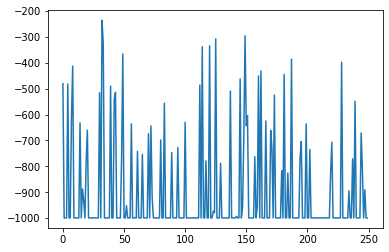

In [249]:
plt.plot(total_rewards)

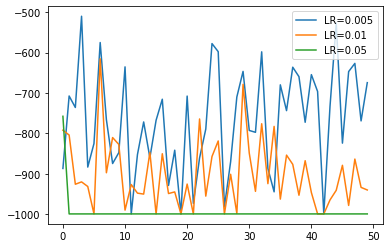

In [263]:
plt.plot(rew_ar005.mean(axis=1), label="LR=0.005")
plt.plot(rew_ar.mean(axis=1), label="LR=0.01")
plt.plot(rew_ar05.mean(axis=1), label="LR=0.05")
plt.legend()

In [ ]:
policy_est

In [248]:
total_rewards, steps = REINFORCE(env, 250, policy_est, 0.01, gamma = 0.9, baseline_window = 10, mc=True)

Iteration finished after 482 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 483 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 611 timesteps
Iteration finished after 414 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 633 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 888 timesteps
Iteration finished after 932 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 784 timesteps
Iteration finished after 661 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration finished after 1000 timesteps
Iteration

## Q-learning

### Evaluation

In [264]:
def gym_evaluation(env, Q_table, step_bound = 1500, num_itr = 10, n_bins=20):
	"""
	Semi-greedy evaluation for discrete state and discrete action spaces and an episodic environment.

	Input:
		env : an environment object. 
		Q : A numpy array. Q values for all state and action pairs. 
			Q.shape = (the number of states, the number of actions)
		step_bound : the maximum number of steps for each iteration
		num_itr : the number of iterations

	Output:
		Total number of steps taken to finish an episode (averaged over num_itr trials)
		Cumulative reward in an episode (averaged over num_itr trials)

	"""
	total_step = 0 
	total_reward = 0 
	itr = 0 
	while(itr<num_itr):
		step = 0
		np.random.seed()
		state = discrete_state(env.reset(), n_bins, env)
		reward = 0.0
		done = False
		while((not done) and (step < step_bound)):
			action = get_action(Q_table[tuple(state)], 0.1)
			state_n, r, done, _ = env.step(action)
			state = discrete_state(state_n, n_bins, env)
			reward += r
			step +=1
		total_reward += reward
		total_step += step
		itr += 1
	return total_step/float(num_itr), total_reward/float(num_itr)


### Acrobot

For Q-learning, we would like to discretize the state space. 

In [265]:
env = gym.make('Acrobot-v1')

(env.observation_space.low, env.observation_space.high)

(array([ -1.      ,  -1.      ,  -1.      ,  -1.      , -12.566371,
        -28.274334], dtype=float32),
 array([ 1.      ,  1.      ,  1.      ,  1.      , 12.566371, 28.274334],
       dtype=float32))

Let us first look at results when we divide each of the observation values into 10 different bins

In [266]:
n_bins = 20

def discrete_state(state, n_bins, env):
    diff = env.observation_space.high - env.observation_space.low
    bin_size = diff / n_bins
    shifted_state = state - env.observation_space.low
    mult = n_bins / diff
    table_state = shifted_state * mult
    return table_state.astype(int)

discrete_state(env.reset(), n_bins, env)

array([19,  9, 19, 10, 10, 10])

In [267]:
np.random.uniform(-2, 0, env.action_space.n)

array([-1.60672698, -1.79672396, -1.79412126])

In [268]:
from collections import defaultdict

def get_action(V, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(0,len(V))
    else:
        return np.argmax(V)

def q_learning(env, iterations=10000, lr=0.1, n_bins=10, gamma=0.8):
    current_Q_table = defaultdict(lambda: np.random.uniform(-2, 0, env.action_space.n))
    print(current_Q_table)
    
    # Start new environment
    s = env.reset()
    done = False
    
    # Some initialization #
    eval_steps, eval_reward, RMSE = [], [], []

    for i in range(iterations):
        # your Q-learning part goes here #
        s = discrete_state(env.reset(), n_bins, env)
        #print(s)
        done = False
        keep = 0
        while not done:
            #print(type(s))
            #print(current_Q_table[s].shape)
            V = current_Q_table[tuple(s)]
            #print(V.shape)
            action = get_action(V)
            #print(action)
            #print("Best action", action)
            #print("terminal", s, best_action, tmp)
            following_state, reward, done, _ = env.step(action)
            #if reward > -1:
                #print("finished", i)
            following_state = discrete_state(following_state, n_bins, env)
            best_action = np.max(current_Q_table[tuple(following_state)])
            a_index = tuple(s) + (action,)

            value = (1 - lr) * current_Q_table[tuple(s)][action] + lr * (reward + gamma * best_action)
            #print(value)
            current_Q_table[tuple(s)][action] = (1 - lr) * current_Q_table[tuple(s)][action] + \
                lr * (reward + gamma * best_action)
            #print(current_Q_table[s, best_action])
            #print("Next state", following_state)
            s = following_state
            #if done:
            #    print("Done", i, keep)
            keep += 1
            

        if i % 250 == 0:
            avg_step, avg_reward = gym_evaluation(env, current_Q_table.copy(), n_bins=n_bins)
            eval_steps.append(avg_step)
            eval_reward.append(avg_reward)
            print("Average reward", avg_reward)
            #mse = (np.square(current_Q_table - Q_star)).mean(axis=None)
            #RMSE.append(np.sqrt(mse))
            print(i)
        if i == iterations:
            break
    return current_Q_table, eval_steps, eval_reward
 

In [269]:
Q_table, evel_steps, eval_reward = q_learning(env, lr=0.2)

defaultdict(<function q_learning.<locals>.<lambda> at 0x7f4f5e96bd40>, {})
Average reward -500.0
0
Average reward -432.2
250
Average reward -381.3
500
Average reward -422.5
750
Average reward -341.3
1000
Average reward -366.0
1250
Average reward -433.9
1500
Average reward -343.8
1750
Average reward -338.7
2000
Average reward -342.4
2250
Average reward -300.7
2500
Average reward -404.4
2750
Average reward -321.1
3000
Average reward -403.5
3250
Average reward -339.6
3500
Average reward -406.7
3750
Average reward -239.4
4000
Average reward -299.2
4250
Average reward -243.0
4500
Average reward -249.6
4750
Average reward -248.4
5000
Average reward -280.3
5250
Average reward -213.2
5500
Average reward -347.5
5750
Average reward -319.3
6000
Average reward -323.9
6250
Average reward -404.0
6500
Average reward -302.4
6750
Average reward -310.5
7000
Average reward -411.4
7250
Average reward -239.5
7500
Average reward -325.8
7750
Average reward -272.4
8000
Average reward -298.3
8250
Average rewar

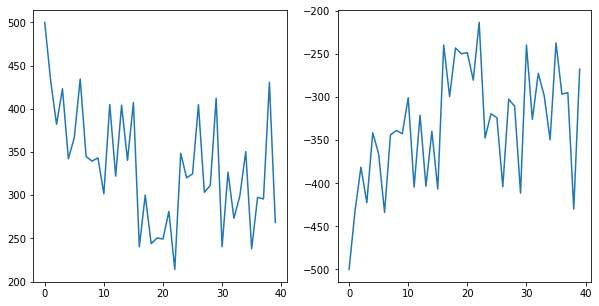

In [274]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(evel_steps)
ax2.plot(eval_reward)

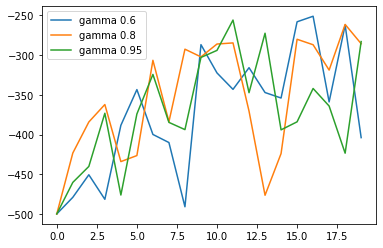

In [ ]:
plt.plot(eval_06_reward, label="gamma 0.6")
plt.plot(eval_reward, label="gamma 0.8")
plt.plot(eval_10_reward[:20], label="gamma 0.95")
plt.legend()

In [ ]:
eval_06_reward = eval_reward

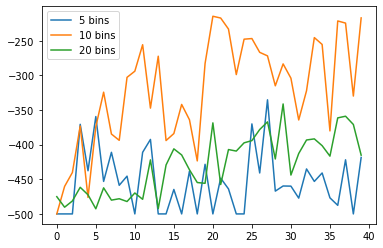

In [ ]:
plt.plot(eval_reward, label="5 bins")
plt.plot(eval_10_reward, label="10 bins")
plt.plot(eval_reward_20[:40], label="20 bins")
plt.legend()

In [ ]:
eval_5_reward = eval_reward

In [ ]:
eval_10_reward = eval_reward

In [ ]:
eval_reward_20 = eval_reward
eval_steps_20 = eval_reward

In [ ]:
Q_table

defaultdict(<function __main__.q_learning.<locals>.<lambda>>,
            {(39,
              18,
              39,
              20,
              20,
              19): array([-0.05954707, -0.0065383 ,  0.04043939]),
             (39,
              19,
              39,
              19,
              20,
              19): array([-0.13469557,  0.14859507, -0.17698007]),
             (39,
              20,
              39,
              17,
              20,
              19): array([-0.09914186, -0.09191646, -0.09611862]),
             (39,
              22,
              39,
              13,
              20,
              19): array([-0.03019995,  0.13767332, -0.01992676]),
             (39,
              23,
              37,
              11,
              20,
              19): array([0.00657121, 0.01702791, 0.2303495 ]),
             (39,
              23,
              37,
              9,
              20,
              19): array([-0.04084568,  0.00065513, -0.03318067]),


In [ ]:
current_Q_table = defaultdict(lambda: np.zeros(env.action_space.n))

In [ ]:
current_Q_table[(10, 10, 10)]

array([0., 0., 0.])

### MountainCar

In [275]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

(env.observation_space.low, env.observation_space.high)


(array([-1.2 , -0.07], dtype=float32), array([0.6 , 0.07], dtype=float32))

In [276]:
Q_table, evel_steps, eval_reward = q_learning(env, lr=0.2, n_bins=15, gamma=0.99)

defaultdict(<function q_learning.<locals>.<lambda> at 0x7f4f5e3339e0>, {})
Average reward -1000.0
0
Average reward -446.8
250
Average reward -427.1
500
Average reward -263.2
750
Average reward -308.0
1000
Average reward -276.4
1250
Average reward -230.5
1500
Average reward -179.9
1750
Average reward -238.1
2000
Average reward -245.6
2250
Average reward -306.4
2500
Average reward -231.7
2750
Average reward -268.7
3000
Average reward -298.9
3250
Average reward -165.2
3500
Average reward -232.3
3750
Average reward -220.0
4000
Average reward -274.1
4250
Average reward -169.0
4500
Average reward -207.0
4750
Average reward -388.4
5000
Average reward -209.2
5250
Average reward -233.2
5500
Average reward -181.9
5750
Average reward -215.6
6000
Average reward -435.0
6250
Average reward -181.4
6500
Average reward -196.2
6750
Average reward -268.0
7000
Average reward -449.1
7250
Average reward -243.1
7500
Average reward -220.7
7750
Average reward -180.9
8000
Average reward -179.0
8250
Average rewa

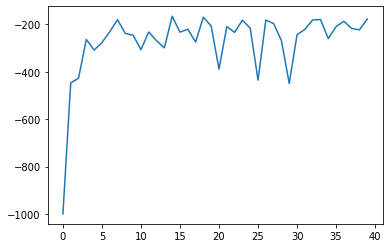

In [279]:
plt.plot(eval_reward)

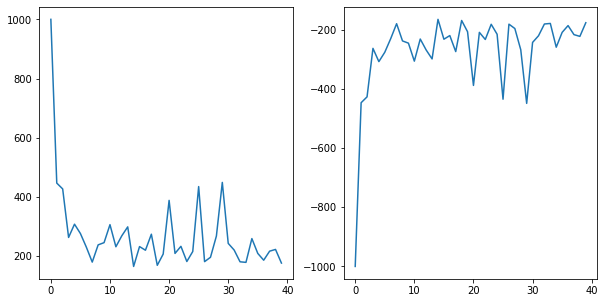

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(evel_steps)
ax2.plot(eval_reward)